In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update file path as needed)
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [3]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [5]:
# Drop rows with missing CustomerID or Description
df_clean = df.dropna(subset=['CustomerID', 'Description'])

In [7]:
# Add Revenue column
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Extract hour from InvoiceDate
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

C:\Users\shaik\AppData\Local\Temp\ipykernel_18140\4092751104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']
C:\Users\shaik\AppData\Local\Temp\ipykernel_18140\4092751104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour


In [9]:
# Analysis

# 1. Top 10 Selling Products (by Quantity)
top_products = (
    df_clean.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [11]:
# 2. Sales by Hour
sales_by_hour = df_clean.groupby('Hour')['InvoiceNo'].count()

In [13]:
# 3. User Retention (Purchase Frequency)
repeat_customers = df_clean.groupby('CustomerID')['InvoiceNo'].nunique()
retention_counts = repeat_customers.value_counts().sort_index()

In [15]:
# 4. Top Revenue-Generating Products
top_revenue_products = (
    df_clean.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(1, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(4, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(5, 0, 'POPCORN HOLDER'),
  Text(6, 0, 'RABBIT NIGHT LIGHT'),
  Text(7, 0, 'MINI PAINT SET VINTAGE '),
  Text(8, 0, 'PACK OF 12 LONDON TISSUES '),
  Text(9, 0, 'PACK OF 60 PINK PAISLEY CAKE CASES')])

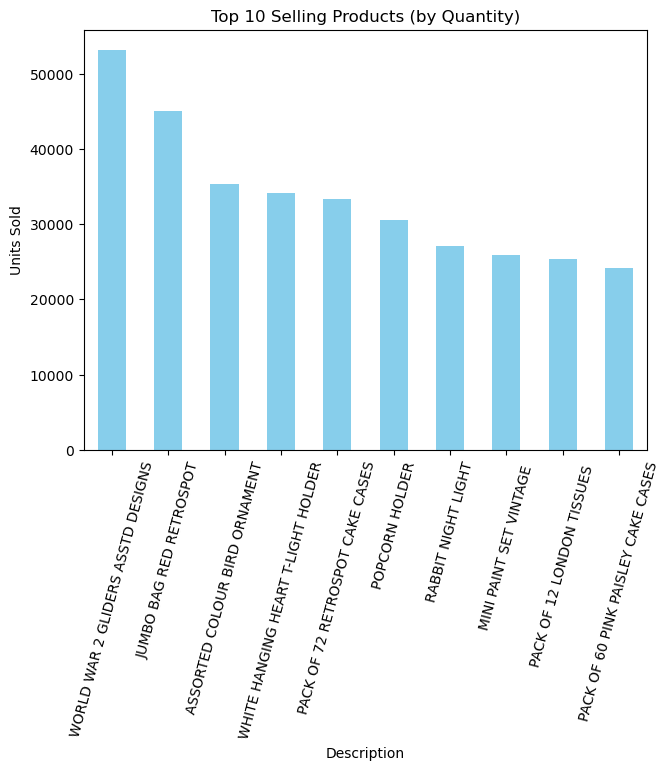

In [17]:
# Visualization

plt.figure(figsize=(16, 12))

# Top Products by Quantity
plt.subplot(2, 2, 1)
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Products (by Quantity)")
plt.ylabel("Units Sold")
plt.xticks(rotation=75)

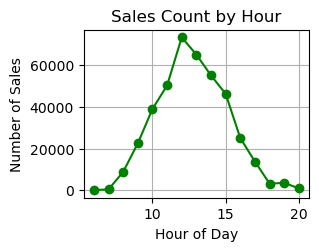

In [19]:
# Sales by Hour
plt.subplot(2, 2, 2)
sales_by_hour.plot(kind='line', marker='o', color='green')
plt.title("Sales Count by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sales")
plt.grid(True)

Text(0, 0.5, 'Number of Customers')

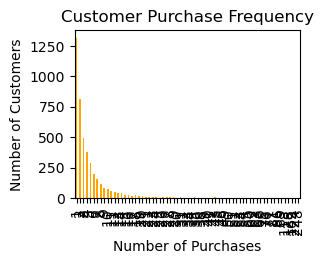

In [21]:
# Customer Purchase Frequency
plt.subplot(2, 2, 3)
retention_counts.plot(kind='bar', color='orange')
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")# Customer Purchase Frequency
plt.subplot(2, 2, 3)
retention_counts.plot(kind='bar', color='orange')
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")

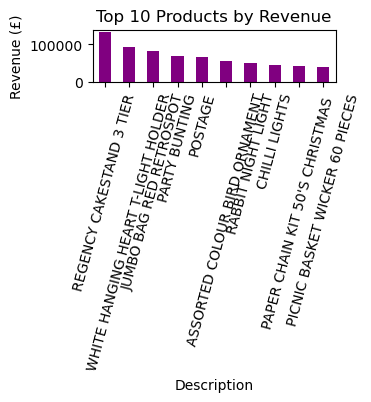

In [23]:
# Top Products by Revenue
plt.subplot(2, 2, 4)
top_revenue_products.plot(kind='bar', color='purple')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue (£)")
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()